<a href="https://colab.research.google.com/github/jmamath/UVS-Probabilite-Statistiques/blob/master/TP_Least_Square.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Régression linéaire ordinaire et pondérée

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Rappels de cours

Commençons par créer des données suivant les hypothèses de *linéarité* et d'*homoscédasticité*. Puis des données suivant l'hypothèse de linéarité et d'*hétéroscédasticité*.

### Question de cours
Dans vos propre mots expliquez l'hypothèse de:
* linéarité
* homoscédasticité
* hétéroscédasticité

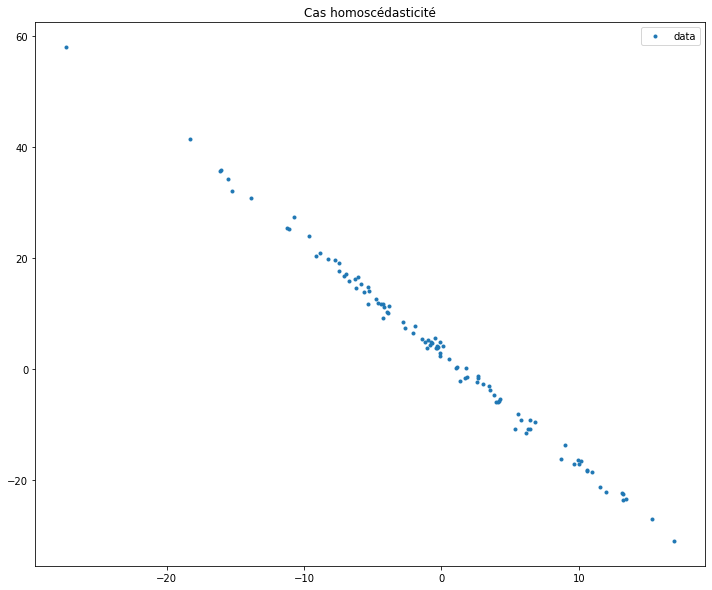

In [2]:
######### SYNTHETIC DATASET HOMOSCEDASTICITY ######### 
size = 100

x1 = np.random.normal(loc=0., scale=9, size=size).reshape(1, size)
noise_homo = np.random.normal(size=(1, size))
y1 = 3 - 2*x1 + noise_homo

plt.figure(figsize=(12,10))
plt.plot(x1[0],y1[0],'.', label="data")
plt.legend()
plt.title("Cas homoscédasticité")
# plt.savefig("homoscedasticity", dpi=300)
x_debut, x_fin = x1.min(), x1.max()

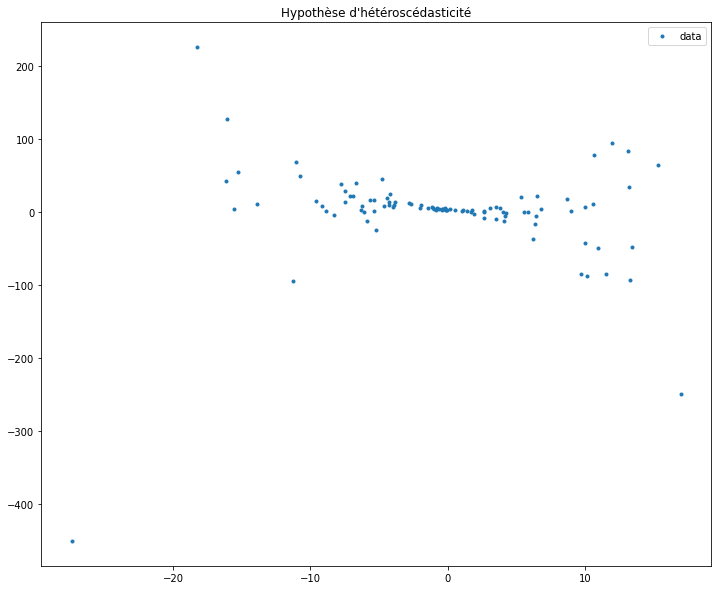

In [3]:
######### SYNTHETIC DATASET HETEROSCEDASTICITY ######### 
variances = (1+x1**2)/2
noise = np.random.normal(scale=variances, size=(1,size))

y2 = 3 - 2*x1 + noise

plt.figure(figsize=(12,10))
plt.plot(x1[0], y2[0], '.', label="data")
plt.title("Hypothèse d'hétéroscédasticité")
# plt.xlim(x_debut, x_fin)
plt.legend()



## 2. Régression linéaire ordinaire avec l'équation normale

### Question
* Rapellez la formule de l'équation normale vu en cours.
* Remplissez le code de la fonction `regression_lineaire`.

In [5]:
def regression_lineaire(x, y):
  """
  Cette fonction resoud l'equation normale et trouve le parametre W de sorte que (Y-W^{T}X)^2 soit minimal
  Input:
    x: Float array. variable explicative du probleme, de dimension (d, size) avec d la dimension de x et size le nombre d'exemples
    y: Float array. Variable a expliquer
  Return:
    weight: Float array. Les parametres de la regression lineaire, de dimension (d, 1)
  """  
  ones = np.ones(x1.shape)
  X = np.concatenate([ones,x], axis=0)
  XX_t = np.matmul(X,X.T)
  XY_t = np.matmul(X,y.T)  
  return np.matmul(np.linalg.inv(XX_t), XY_t)


In [4]:
x1.shape

(1, 100)

In [6]:
weight = regression_lineaire(x1, y1)

In [7]:
def plot_decision_boundary(weight, x_debut, x_fin, size):
    """
    Cette fonction calcule la droite correspondante au parametre W.    
    Input:
      weight: Float array. contient deux valeurs.
      x_debut, x_fin: Floats. representent les bornes de notre droite sur l'axe des absisses
      size: Int. Granularite de la droite entre les bornes x_debut et x_fin
    Output:
      line_x, line_y: peuvent etre utilise pour afficher la droite directement
    """
    w, b = weight[1], weight[0]    
    line_x = np.linspace(x_debut, x_fin,size) 
    line_y = w*line_x + b
    return line_x, line_y

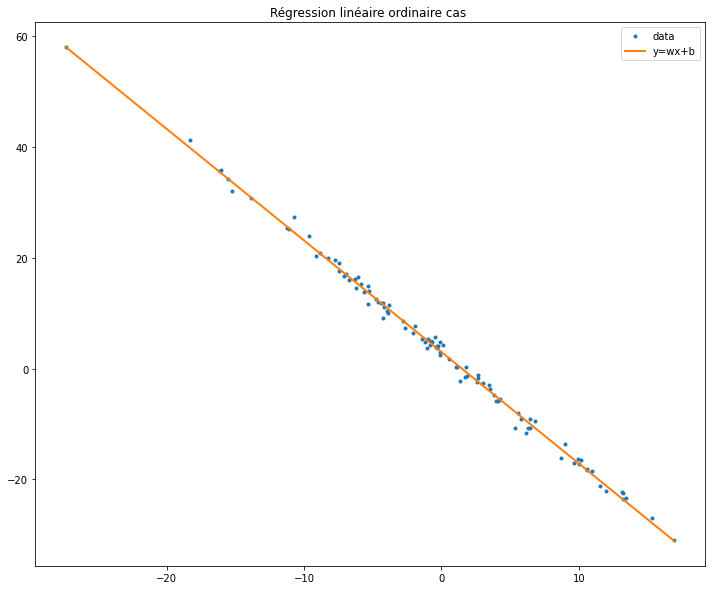

In [8]:
line_x, line_y = plot_decision_boundary(weight, x_debut, x_fin, size)
plt.figure(figsize=(12,10))
plt.plot(x1[0],y1[0],'.', label="data")
plt.plot(line_x, line_y, label="y=wx+b", linewidth=2.)
plt.title("Régression linéaire ordinaire cas ")
plt.legend()

## 2. Régression linéaire pondérée avec l'équation normale

On veut maintenant s'attaquer aux données bruitées. 
Traçons la droite correspondante à la solution de la régression linéaire.

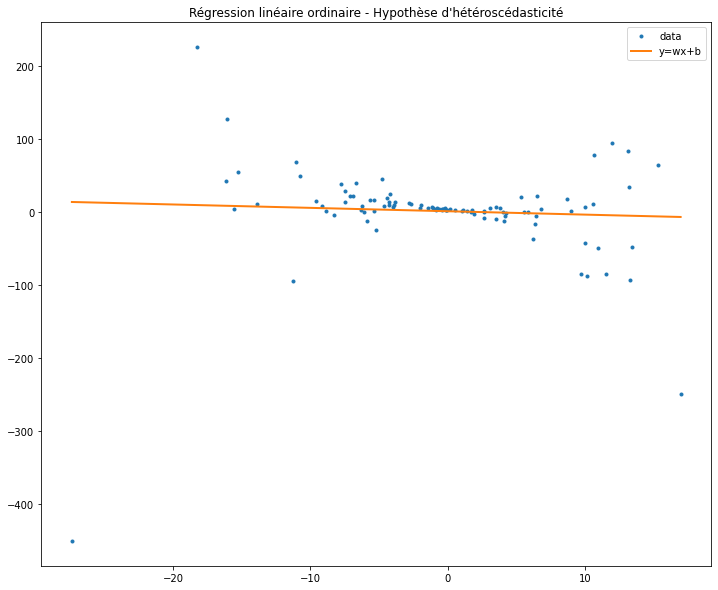

In [9]:
weight = regression_lineaire(x1, y2)
line_x, line_y = plot_decision_boundary(weight, x_debut, x_fin, size)

plt.figure(figsize=(12,10))
plt.plot(x1[0],y2[0],'.', label="data")
plt.plot(line_x, line_y, label="y=wx+b", linewidth=2.)
plt.title("Régression linéaire ordinaire - Hypothèse d'hétéroscédasticité")
plt.legend()

Pas mal n'est-ce pas, cependant, on peut mieux faire avec l'équation normale de la régression linéaire pondérée.
### Question
* Rapellez la formule de l'équation normale pour la régression linéaire pondérée vu en cours.
* Remplissez le code de la fonction `regression_lineaire_pondere`.

Indication: pour enlever une dimension 1 à un array numpy, vous pouvez appliquer la function `squeeze()` voir exemple ci-desous.

In [100]:
print(variances.shape)
print(variances.squeeze().shape)

(1, 100)
(100,)


In [10]:
def regression_lineaire_pondere(x, y, variance):
  """
  Cette fonction resoud l'equation normale et trouve le parametre W de sorte a minimiser (Y=W^{T}X)^2
  Input:
    x: Float array. variable explicative du probleme, de dimension (d,size) avec d la dimension de x et size le nombre d'exemples
    y: Float array. Variable a expliquer
    variance: liste des variances associees aux donnees
  Return:
    weight: Float array. Les parametres de la regression lineaire, de dimension (d, 1)
  """    
  ones = np.ones(x.shape)
  X = np.concatenate([ones,x], axis=0)
  A = np.diag(1/variances.squeeze())
  XAX_t = np.matmul(np.matmul(X,A),X.T)
  XAY_t = np.matmul(np.matmul(X,A),y.T)
  return np.matmul(np.linalg.inv(XAX_t), XAY_t)


In [11]:
weight1 = regression_lineaire(x1, y2)
weight2 = regression_lineaire_pondere(x1, y2, variances)

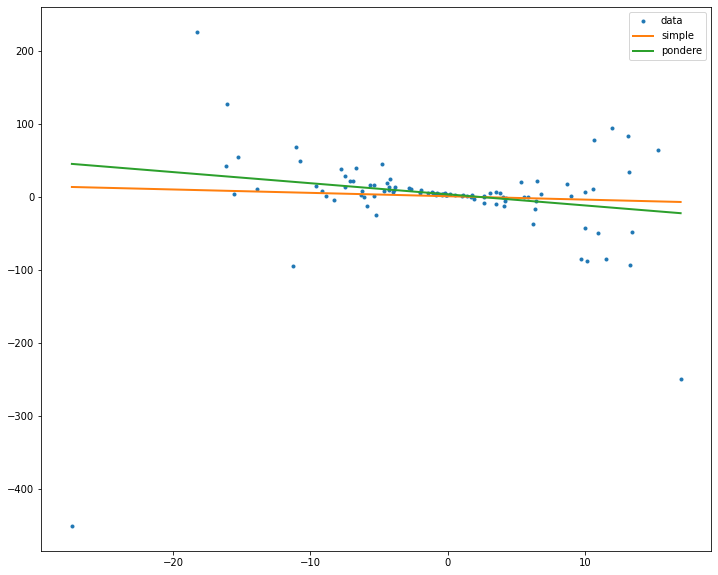

In [12]:
line_x1, line_y1 = plot_decision_boundary(weight1, x_debut, x_fin, size)
line_x2, line_y2 = plot_decision_boundary(weight2, x_debut, x_fin, size)

plt.figure(figsize=(12,10))
plt.plot(x1[0],y2[0],'.', label="data")
plt.plot(line_x1, line_y1, label="simple", linewidth=2.)
plt.plot(line_x2, line_y2, label="pondere", linewidth=2.)
plt.legend()

### Bonus
Calculez l'erreur quadratique de chaque modèle pour les données avec l'hypothèse d'hétéroscédasticité.
Vous remarquerez que de façon surprenante la régression linéaire donne une meilleure erreur.

In [13]:
def erreur_quadratique(x, y, weight):
  w, b = weight[1], weight[0] 
  y_hat = w * x + b
  return np.mean((y-y_hat)**2)

In [14]:
erreur_regression_lineaire = erreur_quadratique(x1, y2, weight1)
erreur_regression_pondere = erreur_quadratique(x1, y2, weight2)

In [15]:
print("Erreur quadratique regression lineaire:", erreur_regression_lineaire)
print("Erreur quadratique regression pondere:", erreur_regression_pondere)

Erreur quadratique regression lineaire: 4311.004766326349
Erreur quadratique regression pondere: 4394.166057506021


C'est un exemple de ce qu'on appelle en apprentissage supervisé le sur apprentissage. En effet l'estimateur de la régression linéaire est biaisé lorsque les données sont hétéroscédastique. Dans ce cas là l'estimateur du maximum de vraisemblance est bien l'estimateur de la régression linéaire pondéré.

Pour s'en convaincre, nous allons générer un nouveau jeux de données suivant les mêmes variances que pour `y2` que nous apellerons `y3`. Et comparer les prédictions faites avec le jeu `(x1,y2)` sur le jeux `(x1,y3)`.

### Question
* Éxécutez plusieurs fois la cellule suivante, et comparez les erreurs quadratiques correspondants à chaque modèle. Que remarquez-vous ?

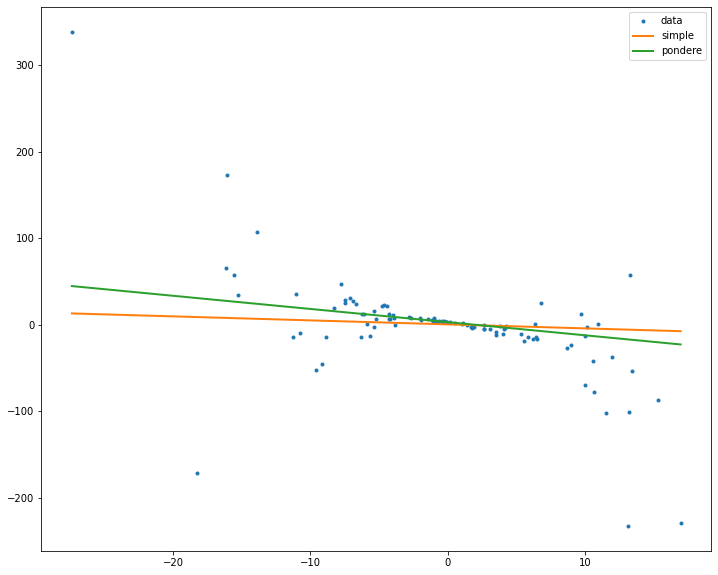

In [30]:
noise = np.random.normal(scale=variances, size=(1,size))

y3 = 3 - 2*x1 + noise

plt.figure(figsize=(12,10))
plt.plot(x1[0],y3[0],'.', label="data")
plt.plot(line_x1, line_y1, label="simple", linewidth=2.)
plt.plot(line_x2, line_y2, label="pondere", linewidth=2.)
plt.legend()

In [31]:
erreur_regression_lineaire = erreur_quadratique(x1, y3, weight1)
erreur_regression_pondere = erreur_quadratique(x1, y3, weight2)

print("Erreur quadratique regression lineaire:", erreur_regression_lineaire)
print("Erreur quadratique regression pondere:", erreur_regression_pondere)

Erreur quadratique regression lineaire: 3444.0171629798924
Erreur quadratique regression pondere: 3005.767478077937


Cependant une limitation de la régression linéaire pondérée, est qu'il faut connaître la variance des données pour pouvoir l'appliquer, cependant, il est difficile d'obtenir une telle variance avec des données réelles.